In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Verificar valores nulos
df.isnull().sum()



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Verificar tipos de dados
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
# Contar a frequência de cada classe
contagem_qualidade = df['quality'].value_counts()
contagem_qualidade


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

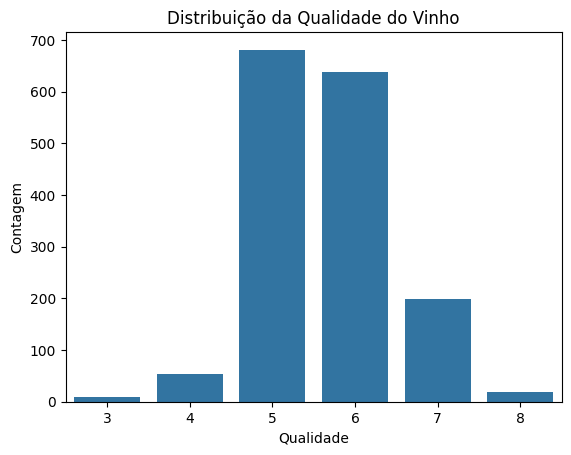

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='quality', data=df)
plt.title('Distribuição da Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')
plt.show()


In [9]:
# Manter os nomes das colunas após scaling
X_train = pd.DataFrame(pipeline.named_steps['scaler'].transform(X_train),
                       columns=X.columns,
                       index=X_train.index)

X_test = pd.DataFrame(pipeline.named_steps['scaler'].transform(X_test),
                      columns=X.columns,
                      index=X_test.index)

NameError: name 'pipeline' is not defined

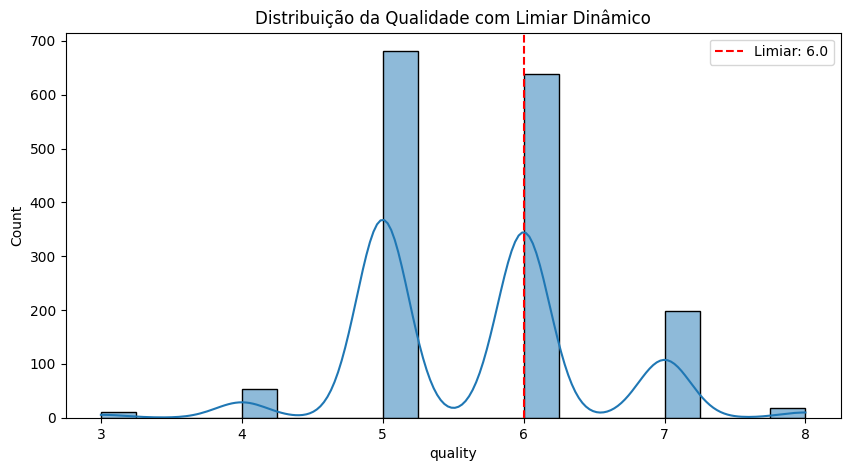

In [ ]:
# Calcular limiar como percentil 70 da qualidade (ajuste conforme necessidade)
import numpy as np

# Ensure df is defined
if 'df' not in globals():
	df = pd.read_csv('winequality-red.csv')

limiar = np.percentile(df['quality'], 70)
df['qualidade_binaria'] = (df['quality'] >= limiar).astype(int)

# Visualização interativa
plt.figure(figsize=(10, 5))
sns.histplot(df['quality'], bins=20, kde=True)
plt.axvline(limiar, color='r', linestyle='--', label=f'Limiar: {limiar}')
plt.legend()
plt.title('Distribuição da Qualidade com Limiar Dinâmico')
plt.show()

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Carregar dados
df = pd.read_csv('winequality-red.csv')

# Binarização com limiar adaptativo
limiar = np.percentile(df['quality'], 65)  # Ajuste o percentil conforme necessário
df['qualidade_binaria'] = (df['quality'] >= limiar).astype(int)

# Divisão estratificada inicial
X = df.drop(['quality', 'qualidade_binaria'], axis=1)
y = df['qualidade_binaria']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Pipeline completo com proteção contra vazamento
pipeline = ImbPipeline([
    ('scaler', RobustScaler()),
    ('smote', SMOTE(sampling_strategy='auto', k_neighbors=5)),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        class_weight='balanced_subsample',
        random_state=42
    ))
])

# Treinamento e avaliação
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       149
           1       0.84      0.79      0.81       171

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [18]:
import pandas as pd


X_train = pd.DataFrame(pipeline.named_steps['scaler'].transform(X_train),
                       columns=X.columns,
                       index=X_train.index)

X_test = pd.DataFrame(pipeline.named_steps['scaler'].transform(X_test),
                      columns=X.columns,
                      index=X_test.index)

In [2]:
from sklearn.linear_model import LogisticRegression

# Ajustar parâmetros:
LogisticRegression(
    solver='saga',  # Algoritmo mais robusto
    penalty='elasticnet',
    l1_ratio=0.5,
    max_iter=1000,  # Aumentar iterações
    class_weight='balanced'
)

LogisticRegression(class_weight='balanced', l1_ratio=0.5, max_iter=1000,
                   penalty='elasticnet', solver='saga')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separar as features (X) e o target (y)
X = df.drop(['quality', 'qualidade_binaria'], axis=1)
y = df['qualidade_binaria']

# Instanciar o scaler
scaler = StandardScaler()

# Ajustar e transformar as features
X_scaled = scaler.fit_transform(X)

# Dividir os dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


NameError: name 'train_data' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instanciar o modelo
modelo = LogisticRegression(random_state=42)

# Treinar o modelo
modelo.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar o modelo
arvore_decisao = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
arvore_decisao.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report
# Fazer previsões
y_pred = modelo.predict(X_test)

# Imprimir relatório de classificação
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.69      0.77      0.73       141
           1       0.80      0.73      0.76       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



Relatório de Classificação - Árvore de Decisão
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       141
           1       0.78      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



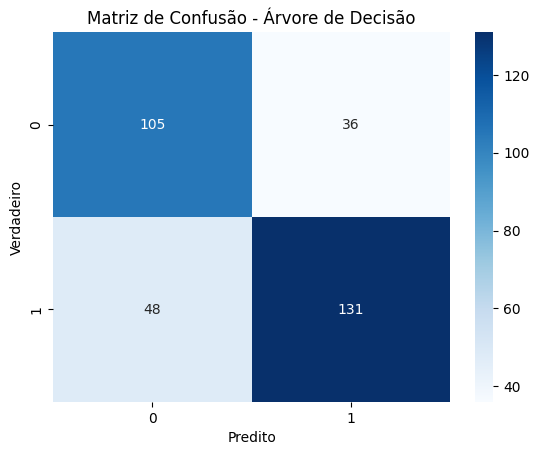

In [ ]:
# Fazer previsões
y_pred_arvore = arvore_decisao.predict(X_test)

# Avaliar o desempenho
from sklearn.metrics import classification_report, confusion_matrix

print("Relatório de Classificação - Árvore de Decisão")
print(classification_report(y_test, y_pred_arvore))

# Matriz de Confusão
import seaborn as sns
import matplotlib.pyplot as plt

cm_arvore = confusion_matrix(y_test, y_pred_arvore)
sns.heatmap(cm_arvore, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()


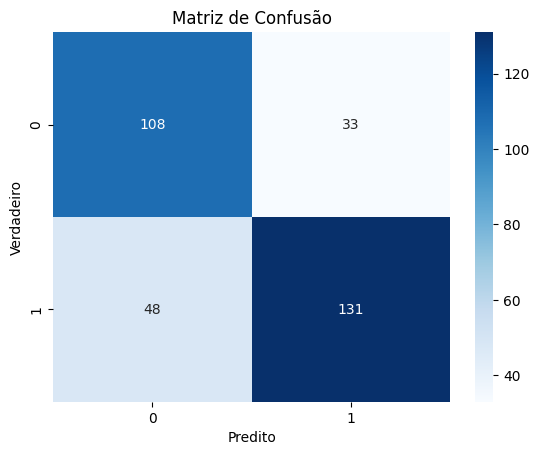

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualização da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()


Relatório de Classificação - Gradient Boosting
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       141
           1       0.80      0.79      0.79       179

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



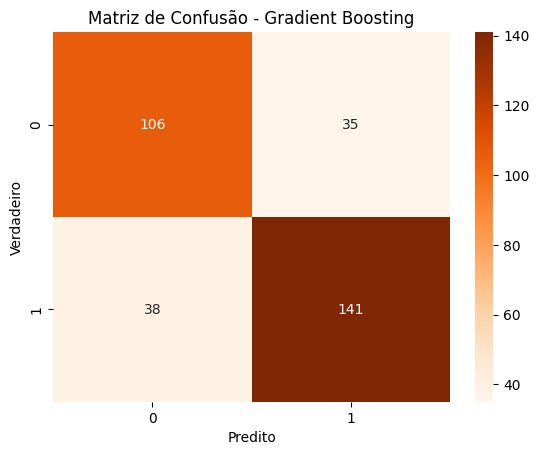

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instanciar o modelo
gbc = GradientBoostingClassifier(random_state=42)

# Treinar o modelo
gbc.fit(X_train, y_train)
# Fazer previsões
y_pred_gbc = gbc.predict(X_test)

# Avaliar o desempenho
print("Relatório de Classificação - Gradient Boosting")
print(classification_report(y_test, y_pred_gbc))

# Matriz de Confusão
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Oranges')
plt.title('Matriz de Confusão - Gradient Boosting')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()


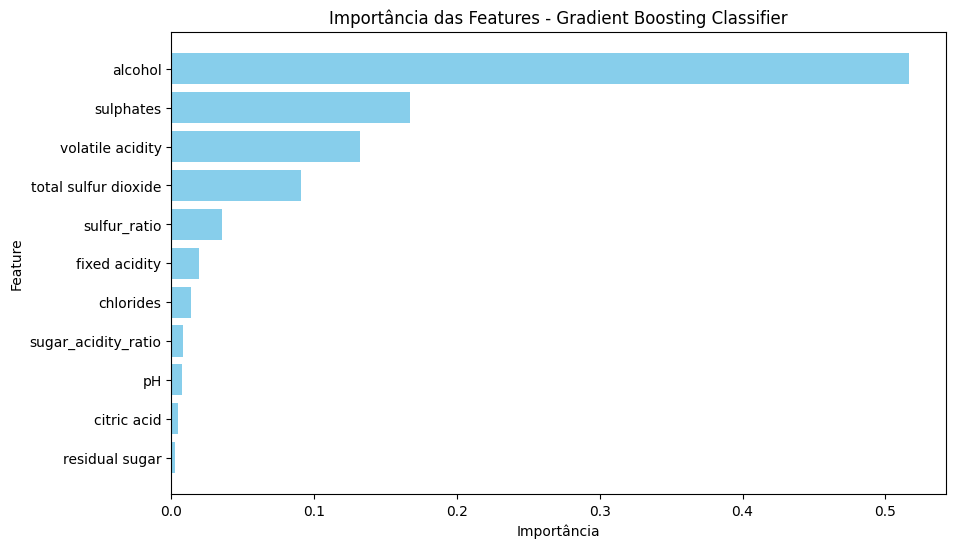

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# 1. Escalando os dados (supondo que X e y já estejam definidos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Definindo e treinando o modelo
modelo = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.01,
    max_depth=3,
    subsample=1.0,
    random_state=42
)
modelo.fit(X_scaled, y)

# 3. Obter a importância das features
importancia_features = modelo.feature_importances_

# 4. Criar um DataFrame para facilitar a visualização
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importância': importancia_features
}).sort_values(by='Importância', ascending=False)

# 5. Plotar as importâncias das features
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importância'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features - Gradient Boosting Classifier')
plt.gca().invert_yaxis()  # Inverte o eixo para mostrar as features mais importantes no topo
plt.show()


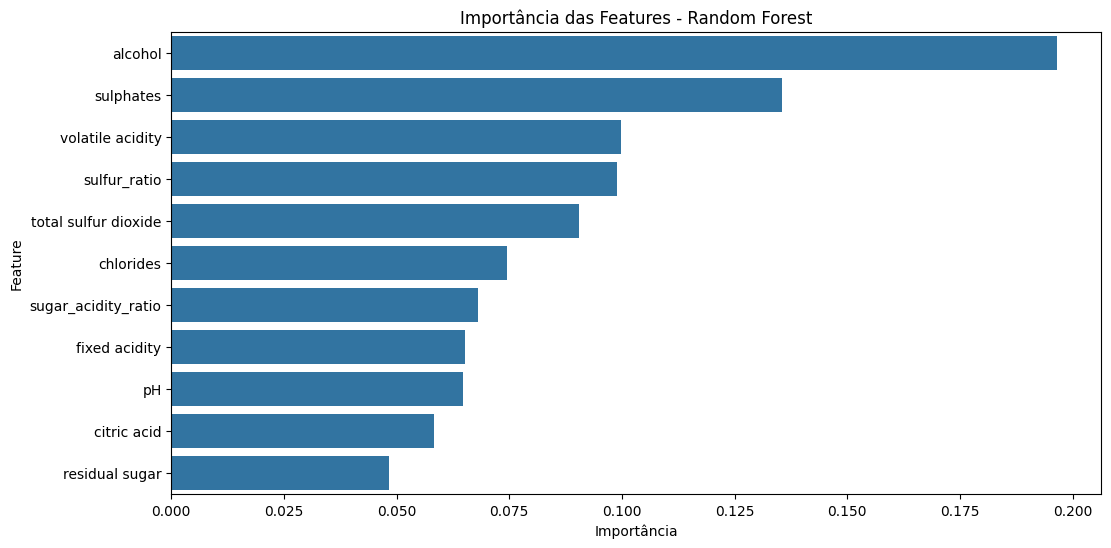

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
#+
# Instanciar o modelo Random Forest#+
random_forest = RandomForestClassifier(random_state=42)#+
#+
# Treinar o modelo#+
random_forest.fit(X_train, y_train)#+
#+
importances = random_forest.feature_importances_#+
features = X.columns#+
indices = np.argsort(importances)[::-1]#+
#+
plt.figure(figsize=(12,6))#+
plt.title("Importância das Features - Random Forest")#+
sns.barplot(x=importances[indices], y=features[indices])#+
plt.xlabel('Importância')#+
plt.ylabel('Feature')#+
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir a grade de parâmetros
param_grid = {
    'C': [0.01, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Instanciar o GridSearchCV
grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1')

# Ajustar aos dados de treinamento
grid.fit(X_train, y_train)

# Melhor modelo encontrado
melhor_modelo = grid.best_estimator_
print("Melhores parâmetros:", grid.best_params_)


Melhores parâmetros: {'C': 0.01, 'solver': 'lbfgs'}


In [ ]:
# Treinar o melhor modelo
melhor_modelo.fit(X_train, y_train)

# Fazer previsões
y_pred_melhor = melhor_modelo.predict(X_test)

# Avaliar o desempenho
print(classification_report(y_test, y_pred_melhor))


              precision    recall  f1-score   support

           0       0.69      0.76      0.72       141
           1       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.75      0.74      0.74       320



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=11)

model_knn.fit(X_train, y_train)

y_pred_melhor = model_knn.predict(X_test)

print(classification_report(y_test, y_pred_melhor))


              precision    recall  f1-score   support

           0       0.71      0.67      0.69       141
           1       0.75      0.78      0.77       179

    accuracy                           0.73       320
   macro avg       0.73      0.72      0.73       320
weighted avg       0.73      0.73      0.73       320



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Função para calcular as métricas
def calcular_metricas(y_test, y_pred, modelo_nome):
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {'Modelo': modelo_nome, 'Acurácia': acuracia, 'Precisão': precisao, 'Recall': recall, 'F1-Score': f1}

# Calcular as métricas para cada modelo
metricas_lr = calcular_metricas(y_test, y_pred_melhor, 'Regressão Logística')
metricas_arvore = calcular_metricas(y_test, y_pred_arvore, 'Árvore de Decisão')
metricas_rf = calcular_metricas(y_test, y_pred_gbc, 'Random Forest')
metricas_gbc = calcular_metricas(y_test, y_pred_gbc, 'Gradient Boosting')

# Criar o DataFrame
df_metricas = pd.DataFrame([metricas_lr, metricas_arvore, metricas_rf, metricas_gbc])

print(df_metricas)


                Modelo  Acurácia  Precisão    Recall  F1-Score
0  Regressão Logística  0.731250  0.748663  0.782123  0.765027
1    Árvore de Decisão  0.737500  0.784431  0.731844  0.757225
2        Random Forest  0.771875  0.801136  0.787709  0.794366
3    Gradient Boosting  0.771875  0.801136  0.787709  0.794366


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 4],
    'min_samples_split': [2, 5, 7]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Melhores parâmetros - Random Forest:", grid_rf.best_params_)



Melhores parâmetros - Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
melhor_rf = grid_rf.best_estimator_

# Fazer previsões
y_pred_melhor_rf = melhor_rf.predict(X_test)

# Avaliar o desempenho
print("Relatório de Classificação - Melhor Random Forest")
print(classification_report(y_test, y_pred_melhor_rf))


Relatório de Classificação - Melhor Random Forest
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       141
           1       0.83      0.84      0.84       179

    accuracy                           0.82       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.82      0.82      0.82       320



In [ ]:
param_grid_gbc = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.01],
    'max_depth': [2, 3],
    'subsample': [1.0, 0.8]
}


In [ ]:
grid_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbc, cv=5, scoring='f1', n_jobs=-1)
grid_gbc.fit(X_train, y_train)

print("Melhores parâmetros - Gradient Boosting:", grid_gbc.best_params_)


Melhores parâmetros - Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
melhor_gbc = grid_gbc.best_estimator_

# Fazer previsões
y_pred_melhor_gbc = melhor_gbc.predict(X_test)

# Avaliar o desempenho
print("Relatório de Classificação - Melhor Gradient Boosting")
print(classification_report(y_test, y_pred_melhor_gbc))


Relatório de Classificação - Melhor Gradient Boosting
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       141
           1       0.78      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [ ]:
metricas_melhor_rf = calcular_metricas(y_test, y_pred_melhor_rf, 'Melhor Random Forest')
metricas_melhor_gbc = calcular_metricas(y_test, y_pred_melhor_gbc, 'Melhor Gradient Boosting')

# Atualizar o DataFrame
df_metricas_atualizado = pd.DataFrame([metricas_lr, metricas_arvore, metricas_melhor_rf, metricas_melhor_gbc])

print(df_metricas_atualizado)


                     Modelo  Acurácia  Precisão    Recall  F1-Score
0       Regressão Logística  0.731250  0.748663  0.782123  0.765027
1         Árvore de Decisão  0.737500  0.784431  0.731844  0.757225
2      Melhor Random Forest  0.815625  0.829670  0.843575  0.836565
3  Melhor Gradient Boosting  0.740625  0.782353  0.743017  0.762178


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit

# Separar as features e o alvo
X = df.drop(['quality', 'qualidade_binaria'], axis=1)
y = df['qualidade_binaria']

# Definir os modelos individuais
model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model_gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=0.01, max_depth=2, random_state=42)
model_logistic = LogisticRegression(max_iter=500, random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_svm = SVC(kernel='rbf', probability=True, random_state=42)
model_nb = GaussianNB()

# Configurar o ensemble com Voting Classifier (votação majoritária)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', melhor_rf),
        ('gbc', melhor_gbc),
        ('logistic', model_logistic),
        ('knn', model_knn),
        ('svm', model_svm),
        ('nb', model_nb)
    ],
    voting='soft',
    weights=[3, 1, 1, 1, 3, 1]  # Maior peso para SVM
)


# Escalonar as features e aplicar o ensemble com validação cruzada
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Validar o ensemble usando validação cruzada
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores_ensemble = cross_val_score(voting_clf, X_scaled, y, cv=cv, scoring='accuracy')

# Exibir o desempenho do ensemble
print("Acurácia média do Ensemble: {:.4f} ± {:.4f}".format(scores_ensemble.mean(), scores_ensemble.std()))

# Treinar e avaliar modelos individuais para comparação
individual_scores = {}
for name, model in voting_clf.estimators:
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    individual_scores[name] = (scores.mean(), scores.std())
    print(f"Acurácia média do {name}: {scores.mean():.4f} ± {scores.std():.4f}")

# Comparar o desempenho do ensemble com os modelos individuais
print("\nDesempenho do Ensemble e dos Modelos Individuais:")
for model_name, (mean, std) in individual_scores.items():
    print(f"{model_name}: Acurácia média = {mean:.4f} ± {std:.4f}")


Acurácia média do Ensemble: 0.7663 ± 0.0105
Acurácia média do rf: 0.8081 ± 0.0151
Acurácia média do gbc: 0.7419 ± 0.0239
Acurácia média do logistic: 0.7263 ± 0.0214
Acurácia média do knn: 0.7519 ± 0.0215
Acurácia média do svm: 0.7488 ± 0.0269
Acurácia média do nb: 0.7169 ± 0.0159

Desempenho do Ensemble e dos Modelos Individuais:
rf: Acurácia média = 0.8081 ± 0.0151
gbc: Acurácia média = 0.7419 ± 0.0239
logistic: Acurácia média = 0.7263 ± 0.0214
knn: Acurácia média = 0.7519 ± 0.0215
svm: Acurácia média = 0.7488 ± 0.0269
nb: Acurácia média = 0.7169 ± 0.0159


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Ajustar o ensemble no conjunto de treinamento
voting_clf.fit(X_train_scaled, y_train)  # Substitua X_train_scaled e y_train conforme necessário

# Prever no conjunto de teste
y_pred = voting_clf.predict(X_test_scaled)  # Substitua X_test_scaled conforme necessário

# Avaliar desempenho
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia do ensemble no conjunto de teste:", accuracy)
print("F1-score do ensemble no conjunto de teste:", f1)


NameError: name 'X_train_scaled' is not defined

C:\Users\roger\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\roger\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

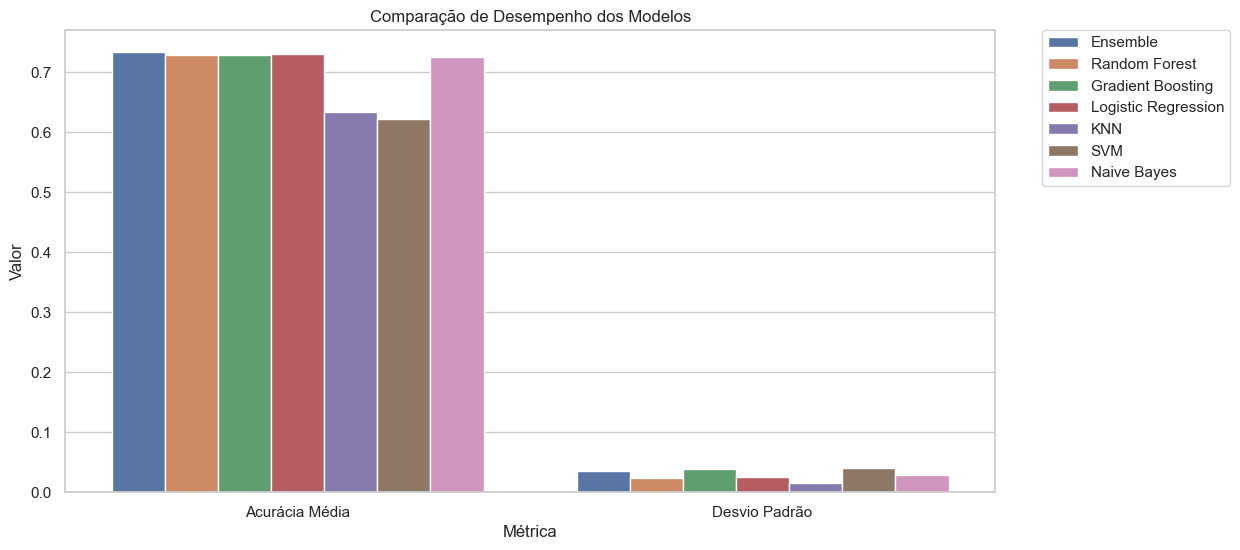

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Função para avaliar os modelos e plotar o gráfico
def avaliar_modelos_e_plotar(X, y):
    # Definir os modelos
    modelos = {
        'Ensemble': VotingClassifier(estimators=[
            ('rf', RandomForestClassifier()),
            ('gb', GradientBoostingClassifier()),
            ('lr', LogisticRegression())
        ], voting='soft'),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Logistic Regression': LogisticRegression(),
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(probability=True),
        'Naive Bayes': GaussianNB()
    }
    
    # Lista para armazenar os resultados
    resultados = {'Modelo': [], 'Acurácia Média': [], 'Desvio Padrão': []}
    
    # Avaliar cada modelo com validação cruzada
    for nome, modelo in modelos.items():
        # Realizar a validação cruzada e calcular a acurácia média e o desvio padrão
        scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
        resultados['Modelo'].append(nome)
        resultados['Acurácia Média'].append(np.mean(scores))
        resultados['Desvio Padrão'].append(np.std(scores))
    
    # Criar o DataFrame com os resultados
    df_resultados = pd.DataFrame(resultados)

    # Melt do DataFrame para facilitar a plotagem
    df_metricas_melted = df_resultados.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

    # Plotar as métricas
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Métrica', y='Valor', hue='Modelo', data=df_metricas_melted)
    plt.title('Comparação de Desempenho dos Modelos')
    plt.ylabel('Valor')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

# Exemplo de uso (supondo que X e y já estejam definidos como variáveis de features e target)
# X = ... (seu conjunto de dados de entrada)
# y = ... (seu conjunto de dados de saída)
avaliar_modelos_e_plotar(X, y)


C:\Users\roger\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\roger\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

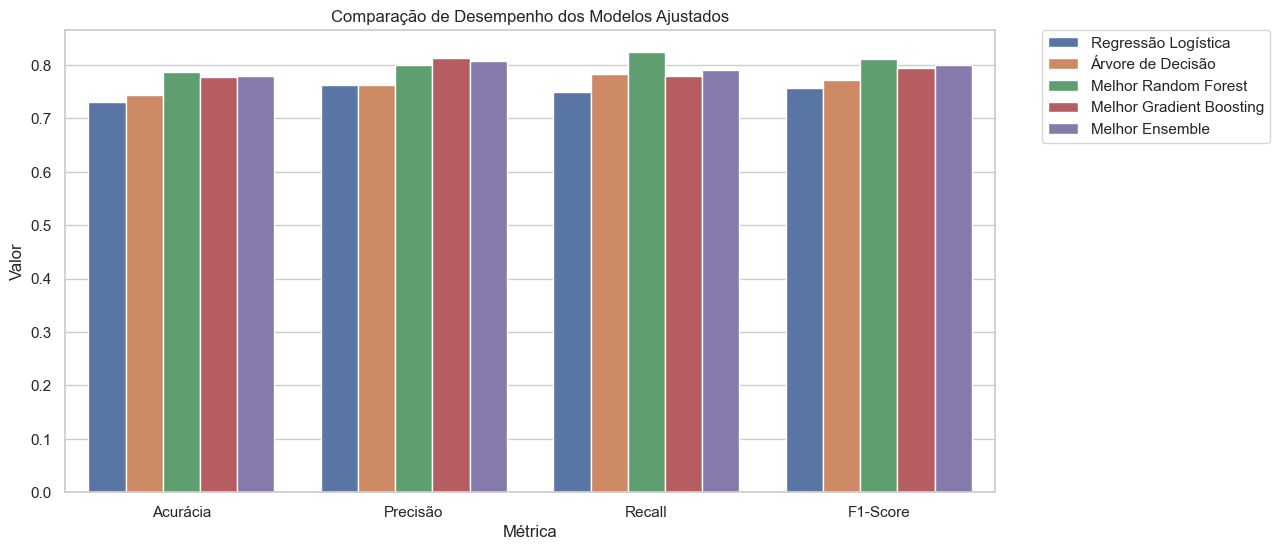

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Função para calcular métricas e plotar
def avaliar_metricas_e_plotar(X, y):
    # Dividir os dados em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Definir os modelos
    modelos = {
        'Regressão Logística': LogisticRegression(),
        'Árvore de Decisão': DecisionTreeClassifier(),
        'Melhor Random Forest': RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=5),
        'Melhor Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, subsample=0.8),
        'Melhor Ensemble': VotingClassifier(estimators=[
            ('rf', RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=5)),
            ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, subsample=0.8)),
            ('lr', LogisticRegression())
        ], voting='soft')
    }

    # Lista para armazenar as métricas
    resultados = {'Modelo': [], 'Acurácia': [], 'Precisão': [], 'Recall': [], 'F1-Score': []}

    # Avaliar cada modelo
    for nome, modelo in modelos.items():
        # Ajustar o modelo e fazer previsões
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        
        # Calcular as métricas
        resultados['Modelo'].append(nome)
        resultados['Acurácia'].append(accuracy_score(y_test, y_pred))
        resultados['Precisão'].append(precision_score(y_test, y_pred))
        resultados['Recall'].append(recall_score(y_test, y_pred))
        resultados['F1-Score'].append(f1_score(y_test, y_pred))

    # Criar o DataFrame com os resultados
    df_metricas = pd.DataFrame(resultados)

    # Melt do DataFrame para facilitar a plotagem
    df_metricas_melted = df_metricas.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

    # Plotar as métricas
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Métrica', y='Valor', hue='Modelo', data=df_metricas_melted)
    plt.title('Comparação de Desempenho dos Modelos Ajustados')
    plt.ylabel('Valor')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

avaliar_metricas_e_plotar(X, y)


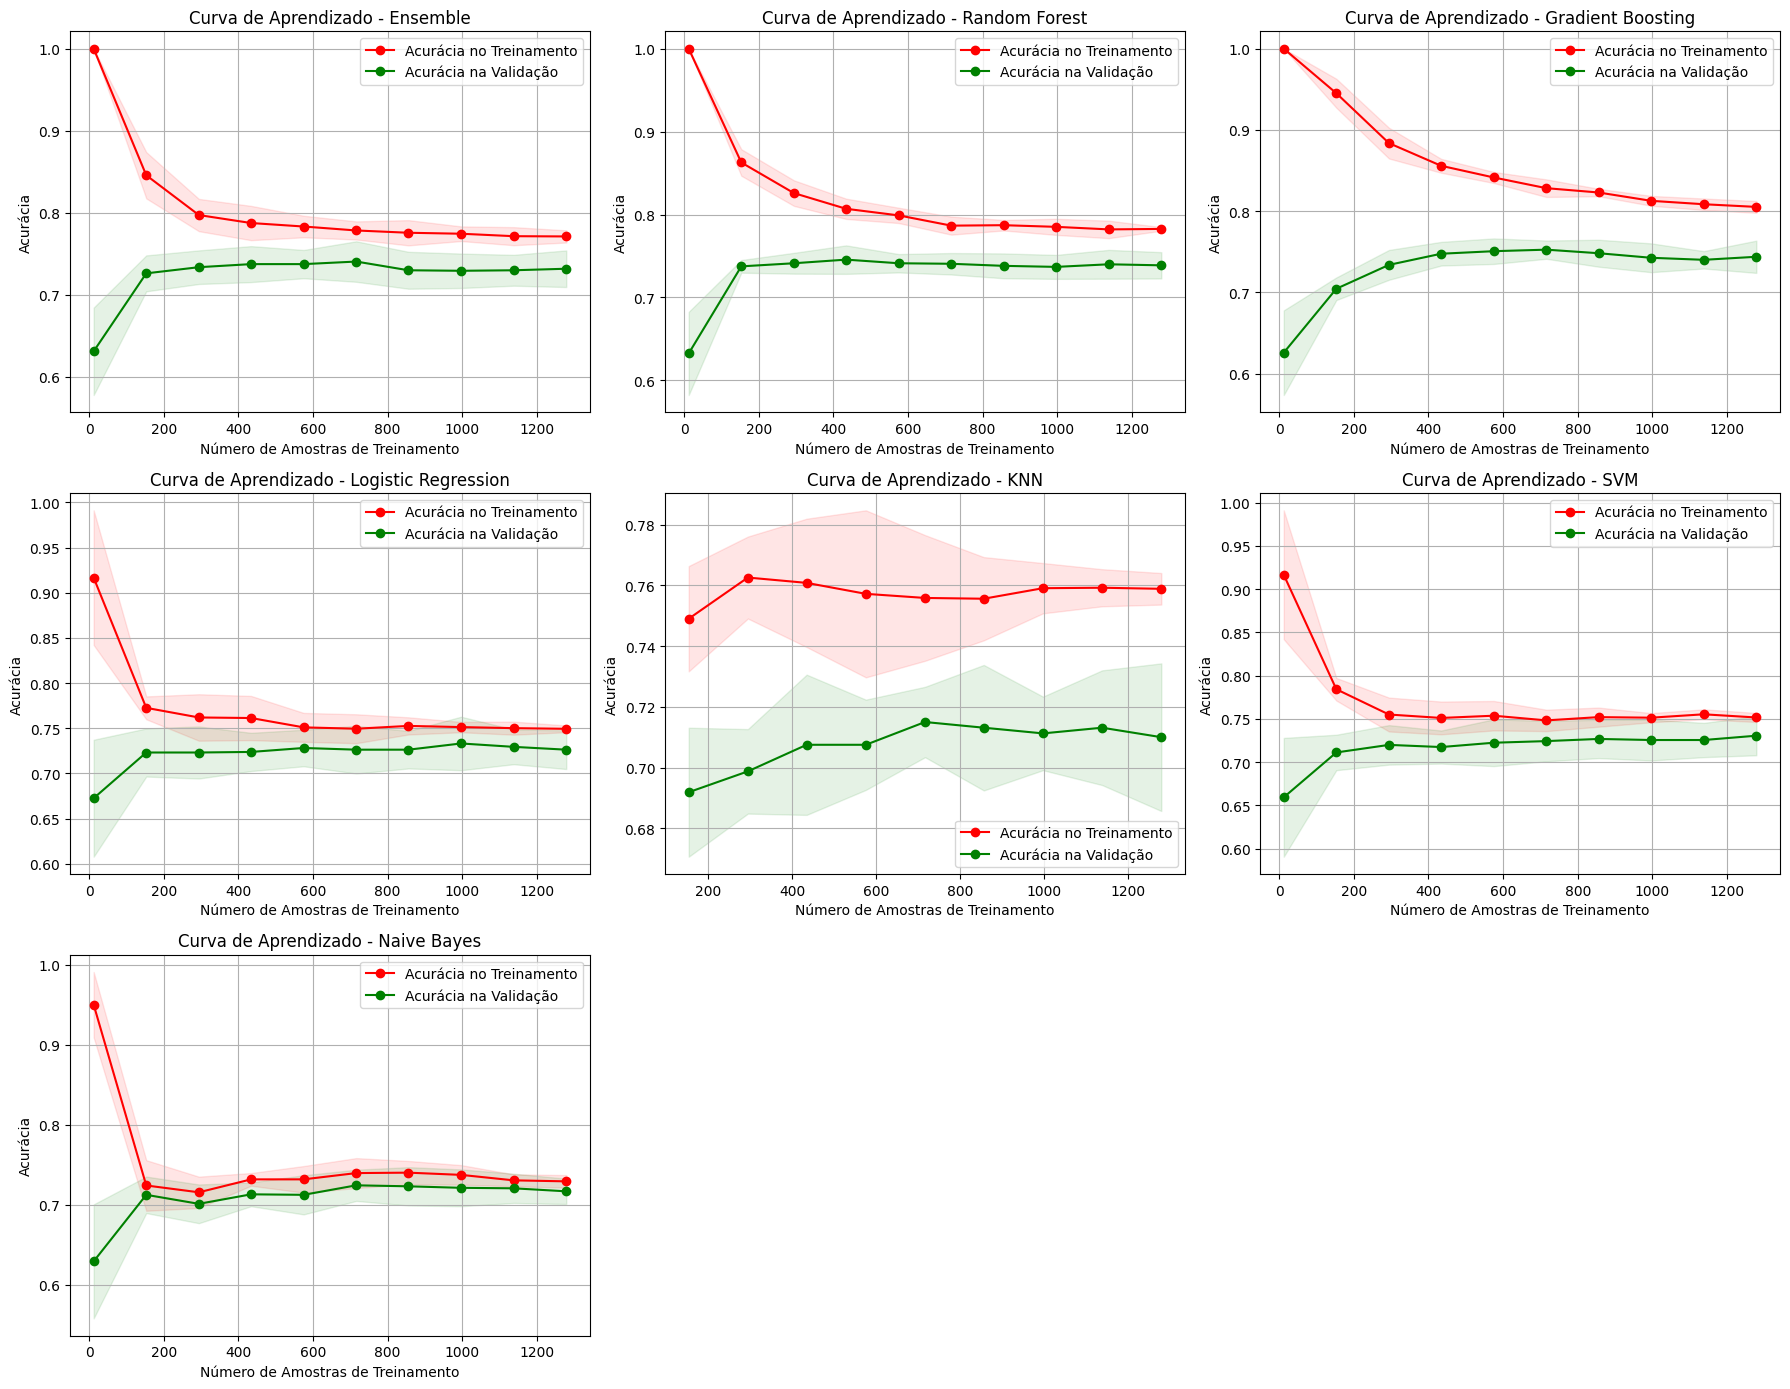

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Separar as features e o alvo
X = df.drop(['quality', 'qualidade_binaria'], axis=1)
y = df['qualidade_binaria']

# Escalonar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configurar a validação cruzada
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Definir os modelos a serem avaliados
modelos = {
    "Ensemble": VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(n_estimators=250, max_depth=3, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=250, learning_rate=0.01, max_depth=2, random_state=42)),
        ('lr', LogisticRegression(random_state=42, max_iter=1000))
    ], voting='soft'),
    
    "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=3, random_state=42, n_jobs=-1),
    
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=250, learning_rate=0.01, max_depth=3, random_state=42),
    
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    
    "KNN": KNeighborsClassifier(n_neighbors=20),
    
    "SVM": SVC(kernel='linear', C=1.0, random_state=42, probability=True),
    
    "Naive Bayes": GaussianNB()
}

# Plotar curvas de aprendizado para cada modelo
plt.figure(figsize=(18, 14))

for i, (nome, modelo) in enumerate(modelos.items(), 1):
    plt.subplot(3, 3, i)
    plt.title(f"Curva de Aprendizado - {nome}")
    plt.xlabel("Número de Amostras de Treinamento")
    plt.ylabel("Acurácia")

    # Calcular as curvas de aprendizado
    train_sizes, train_scores, test_scores = learning_curve(
        modelo, X_scaled, y, cv=cv, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.01, 1.0, 10), shuffle=True, random_state=42
    )

    # Calcular as médias e desvios padrões das acurácias
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Curva de treinamento
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Acurácia no Treinamento")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")

    # Curva de validação
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Acurácia na Validação")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.legend(loc="best")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pickle
import os

# Definir caminhos para o modelo e o scaler
MODEL_PATH = 'modelo_vinho_ensemble.pkl'
SCALER_PATH = 'scaler.pkl'

# Carregar o modelo e o scaler
def carregar_modelo_e_scaler(model_path, scaler_path):
    if not os.path.exists(model_path) or not os.path.exists(scaler_path):
        raise FileNotFoundError("Verifique se os arquivos de modelo e scaler estão presentes.")
    with open(model_path, 'rb') as arquivo_modelo:
        modelo = pickle.load(arquivo_modelo)
    with open(scaler_path, 'rb') as arquivo_scaler:
        scaler = pickle.load(arquivo_scaler)
    return modelo, scaler   

# Função para prever a qualidade do vinho com base nas features
def prever_qualidade_vinho(features, modelo, scaler):
    campos_esperados = [
        "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
        "total sulfur dioxide", "pH", "sulphates", "alcohol"
    ]

    # Verificar e extrair os valores das features na ordem correta
    try:
        vinho_features = np.array([[float(features[campo]) for campo in campos_esperados]])
    except KeyError as e:
        return {"erro": f"Feature ausente: {e.args[0]}"}
    except ValueError:
        return {"erro": "Certifique-se de que todas as features sejam numéricas"}

    # Escalonar as features do vinho
    vinho_features_scaled = scaler.transform(vinho_features)

    # Fazer a previsão
    previsao = modelo.predict(vinho_features_scaled)
    probabilidade = modelo.predict_proba(vinho_features_scaled)

    # Retornar o resultado formatado
    resultado = {
        "previsao": "Alta" if previsao[0] == 1 else "Baixa",
        "probabilidade_alta_qualidade": f"{probabilidade[0][1]:.2%}",
        "probabilidade_baixa_qualidade": f"{probabilidade[0][0]:.2%}"
    }
    return resultado

# Carregar o modelo e o scaler uma vez para reutilização
modelo, scaler = carregar_modelo_e_scaler(MODEL_PATH, SCALER_PATH)


In [ ]:
import pandas as pd

# Certifique-se de que `X_test` tenha os mesmos nomes de colunas usados para treinar o scaler
campos_esperados = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
    "chlorides", "total sulfur dioxide", "pH", "sulphates", "alcohol"
]

# Ajuste o DataFrame `dados_teste_df` para incluir somente as colunas esperadas
dados_teste_df = pd.DataFrame(X_test[:5][campos_esperados], columns=campos_esperados)


# Escalonar os dados de teste
dados_teste_scaled = scaler.transform(dados_teste_df)

# Definir função de previsão com limite ajustado
def prever_com_limite_ajustado(dados_teste, modelo, y_reais, limite=0.3):
    """
    Realiza previsões no conjunto de teste com limite ajustado para a classe 1.
    """
    previsoes_padroes = modelo.predict(dados_teste)
    probabilidade = modelo.predict_proba(dados_teste)[:, 1]  # Probabilidade para a classe 1
    previsoes_ajustadas = (probabilidade >= limite).astype(int)

    print(f"Previsões com Limite Ajustado ({limite}):")
    for i, (previsto, real) in enumerate(zip(previsoes_ajustadas, y_reais)):
        print(f'Amostra {i+1} - Previsão Ajustada: {previsto}, Valor Real: {real}')

    print("\nPrevisões Padrão (Limite 0.5):")
    for i, (previsto, real) in enumerate(zip(previsoes_padroes, y_reais)):
        print(f'Amostra {i+1} - Previsão: {previsto}, Valor Real: {real}')

    if hasattr(modelo, "predict_proba"):
        probabilidade_primeira_amostra = modelo.predict_proba(dados_teste[:1])[0]
        print(f"\nProbabilidade da Primeira Amostra - Classe 1: {probabilidade_primeira_amostra[1]:.2f}, Classe 0: {probabilidade_primeira_amostra[0]:.2f}")

# Executar a função com o DataFrame de teste ajustado
prever_com_limite_ajustado(dados_teste=dados_teste_scaled, modelo=modelo, y_reais=y_test[:5], limite=0.4)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

: 